<a href="https://colab.research.google.com/github/TareDevarsh/machine_learning/blob/master/Stock_market_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q sklearn

In [2]:
import math
import pandas_datareader as rd
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [3]:
df_stock = rd.DataReader('AAPL', data_source='yahoo',start = '2012-01-03',end='2020-05-18')
df_stock.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792


In [4]:
df_stock.shape


(2107, 6)

Text(0, 0.5, 'Close Price')

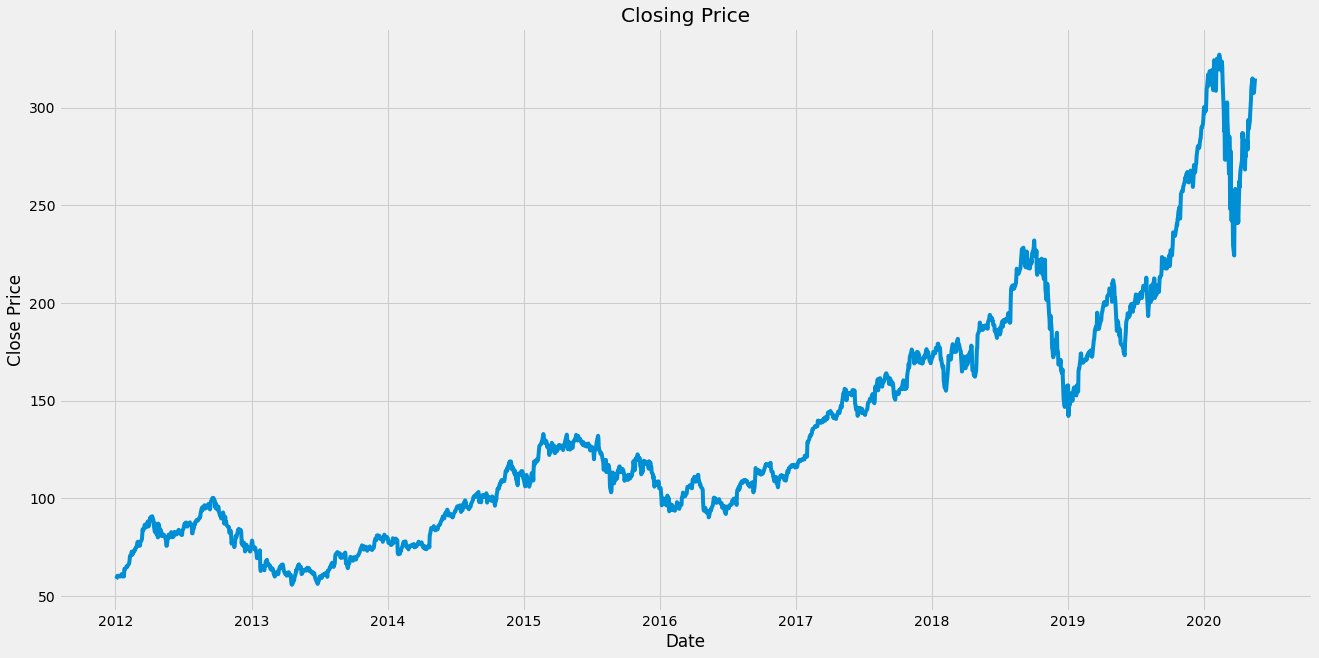

In [6]:
plt.figure(figsize=(20,10))
plt.title('Closing Price')
plt.plot(df_stock['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')

In [7]:
df_close = df_stock.filter(['Close'])

dataset = df_close.values 

data_len = math.ceil(len(dataset)*.85)

data_len  

1791

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01089548],
       [0.01205872],
       [0.01447467],
       ...,
       [0.93493238],
       [0.92818975],
       [0.9549021 ]])

In [0]:
data_train = scaled_data[0:data_len,:] 

x_train = []
y_train = []

for i in range(60 , len(data_train)):
  x_train.append(data_train[i-60:i ,0])
  y_train.append(data_train[i , 0])

In [11]:
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

x_train.shape


(1731, 60, 1)

In [0]:
model = Sequential()
model.add(LSTM(50 ,return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(40 ,return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50 ,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
model.compile(optimizer= 'adam', loss='mean_squared_error')

In [43]:
model.fit(x_train, y_train, batch_size=1, epochs =10)

Epoch 1/10
1731/1731 [==============================] - 477s 276ms/step - loss: 0.0010
Epoch 2/10
1731/1731 [==============================] - 473s 273ms/step - loss: 4.3148e-04
Epoch 3/10
1731/1731 [==============================] - 472s 272ms/step - loss: 3.0173e-04
Epoch 4/10
1731/1731 [==============================] - 473s 273ms/step - loss: 2.6697e-04
Epoch 5/10
1731/1731 [==============================] - 486s 280ms/step - loss: 2.0493e-04
Epoch 6/10
1731/1731 [==============================] - 471s 272ms/step - loss: 2.0398e-04
Epoch 7/10
1731/1731 [==============================] - 458s 264ms/step - loss: 1.6161e-04
Epoch 8/10
1731/1731 [==============================] - 464s 268ms/step - loss: 1.7698e-04
Epoch 9/10
1731/1731 [==============================] - 460s 266ms/step - loss: 1.6630e-04
Epoch 10/10
1731/1731 [==============================] - 455s 263ms/step - loss: 1.6196e-04


In [0]:
data_test = scaled_data[data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(data_test)):
    x_test.append(data_test[i-60:i,0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))



In [45]:
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

8.284314346143997

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


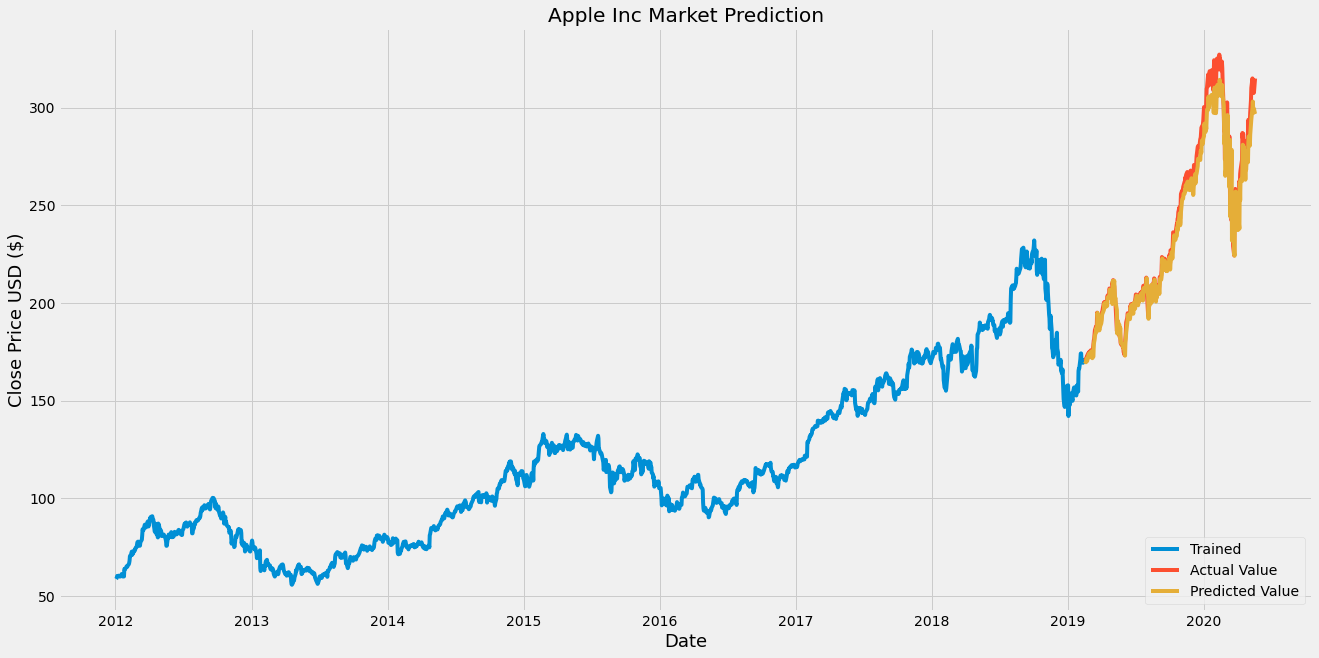

In [46]:
#Plot/Create the data for the graph
train = df_close[:data_len]
valid = df_close[data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(20,10))
plt.title('Apple Inc Market Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Trained', 'Actual Value', 'Predicted Value'], loc='lower right')
plt.show()

In [47]:
apple_quote = rd.DataReader('AAPL', data_source='yahoo',start = '2012-01-03',end='2020-05-22')

#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price 
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[307.10324]]


In [48]:
apple_quote2 = rd.DataReader('AAPL', data_source='yahoo',start = '2020-05-23',end='2020-05-23')
apple_quote2['Close']

Date
2020-05-22    318.890015
Name: Close, dtype: float64

In [0]:
!mkdir -p saved_model
model.save('Stock_anaysis.h5') 